In [156]:
# Handle necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
validation = pd.read_csv('data/validation.csv')

# <span style="color:blue">Basic Bidding Strategies</span>. 

# 1. Constant bidding --> Kamakshi

In [4]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
        
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(4).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [8]:
const

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,360,289.0,0,0.0,802.78,inf
1,4,882,1417.0,0,0.0,1606.58,inf
2,6,7646,33986.0,1,0.0131,4444.94,33986.0
3,8,10850,54653.0,8,0.0737,5037.14,6831.62
4,10,13364,76078.0,8,0.0599,5692.76,9509.75
5,12,17913,123515.0,8,0.0447,6895.27,15439.38
6,14,21058,162741.0,10,0.0475,7728.23,16274.1
7,16,24081,206522.0,11,0.0457,8576.14,18774.73
8,18,28559,280440.0,12,0.042,9819.67,23370.0
9,20,32248,348357.0,13,0.0403,10802.44,26796.69


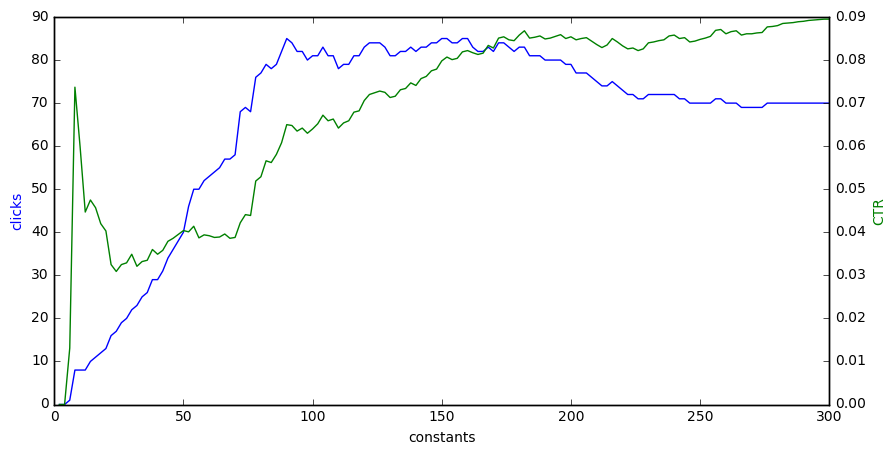

In [9]:
b = const[['clicks','constants']]
a = const[['constants','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.constants,b.clicks)
ax1.set_xlabel('constants')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.constants, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('constant.PNG', dpi=200)
plt.show()

# 2. Random bidding --> Kamakshi

In [10]:
from random import randrange

def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost
            
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm.imps_won = randm.imps_won.astype(int)
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/randm.imps_won * 100).round(4).astype(str)
randm['CPM'] = (randm.total_spend/randm.imps_won * 1000).round(2).astype(str)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2).astype(str)

In [11]:
randm

,upper_bound,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,40,0.0,0,0.0,0.0,nan
1,4,309,378.0,0,0.0,1223.3,inf
2,6,691,1461.0,0,0.0,2114.33,inf
3,8,2623,10825.0,1,0.0381,4126.95,10825.0
4,10,4339,20217.0,3,0.0691,4659.37,6739.0
5,12,6190,32333.0,5,0.0808,5223.42,6466.6
6,14,8019,47313.0,3,0.0374,5900.11,15771.0
7,16,9663,62586.0,4,0.0414,6476.87,15646.5
8,18,11520,81395.0,4,0.0347,7065.54,20348.75
9,20,13154,102130.0,7,0.0532,7764.18,14590.0


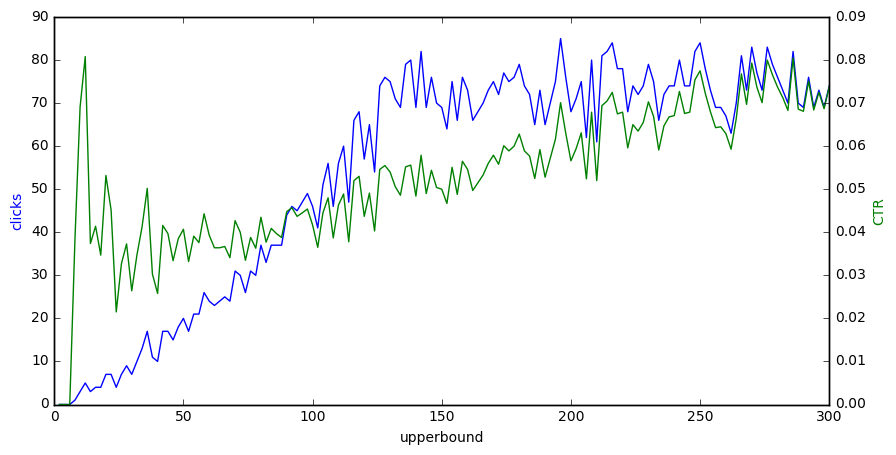

In [12]:
b = randm[['clicks','upper_bound']]
a = randm[['upper_bound','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.upper_bound,b.clicks)
ax1.set_xlabel('upperbound')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.upper_bound, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('random.PNG', dpi=100)
plt.show()

# <span style="color:blue">Linear & Non Linear Bidding Strategies</span>. 

# Feature Engineering --> Said, Kamakshi & James

In [13]:
from sklearn.linear_model import LogisticRegression
import time

In [14]:
# Negative sampling to fix imbalance
def negsample(data, ratio=1):
    conv = data[data.click == 1]
    oth = data[data.click == 0].sample(n=ratio*len(conv))
    return pd.concat([conv, oth]).sample(frac=1) #shuffle data

# neg_sam_train = negsample(train)
# neg_sam_val = negsample(validation)

# y_train_sampled = neg_sam_train.click
# X_train_sampled = neg_sam_train.drop('click', axis=1)

# y_val_sampled = neg_sam_val.click
# X_val_sampled = neg_sam_val.drop('click', axis=1)

# w = len(neg_sam_train)/ len(train)

# print("Negative sample ratio", w)

In [15]:
# Predict CTR
X_train = train.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_train = train.click

X_val = validation.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_val = validation.click
X_test = test.drop(['bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','keypage'], axis=1)

In [16]:
# Handling categorical data with one hot encoding

# 1. Encode day of week
def enc_day(X):
    X = pd.concat([X,pd.get_dummies(X.weekday,prefix='day')],axis=1)
    X = X.drop('weekday',axis=1)
    return X

# 2. Encode hours
def enc_hrs(X):
    X = pd.concat([X,pd.get_dummies(X.hour,prefix='hour')],axis=1)
    X = X.drop('hour',axis=1)
    return X

# Split user agent into 2 ~ OS and browser
def enc_OS_browser(X):
    df = pd.DataFrame(X.useragent.str.split('_',1).tolist(),
                                   columns = ['OS','browser'])
    X = pd.concat([X,df],axis=1)

    # 3. Encode OS
    X = pd.concat([X,pd.get_dummies(X.OS,prefix='OS')],axis=1)
    X = X.drop('OS',axis=1)

    # 4. Encode browser
    X = pd.concat([X,pd.get_dummies(X.browser,prefix='browser')],axis=1)
    X = X.drop('browser',axis=1)
    
    X = X.drop('useragent',axis=1)
    return X

In [17]:
# 5. Encode region
def enc_region(X):
    X = pd.concat([X,pd.get_dummies(X.region,prefix='region')],axis=1)
    X = X.drop('region',axis=1)
    return X

# 6. Encode adexchange
def enc_adexchange(X):
    X = pd.concat([X,pd.get_dummies(X.adexchange,prefix='adexchange')],axis=1)
    X = X.drop('adexchange',axis=1)
    return X

In [18]:
# 7. Encode slotwidth
def enc_slotwidth(X):
    X = pd.concat([X,pd.get_dummies(X.slotwidth,prefix='slotwidth')],axis=1)
    X = X.drop('slotwidth',axis=1)
    return X

# 8. Encode slotheight
def enc_slotheight(X):
    X = pd.concat([X,pd.get_dummies(X.slotheight,prefix='slotheight')],axis=1)
    X = X.drop('slotheight',axis=1)
    return X

In [19]:
# 9. Encode slotvisibility
def enc_slotvisibility(X):
    X = pd.concat([X,pd.get_dummies(X.slotvisibility,prefix='slotvisibility')],axis=1)
    X = X.drop('slotvisibility',axis=1)
    return X

# 10. Encode slotformat
def enc_slotformat(X):
    X = pd.concat([X,pd.get_dummies(X.slotformat,prefix='slotformat')],axis=1)
    X = X.drop('slotformat',axis=1)
    return X

# 11. Encode advertiser
def enc_advertiser(X):
    X = pd.concat([X,pd.get_dummies(X.advertiser,prefix='advertiser')],axis=1)
    X = X.drop('advertiser',axis=1)
    return X

In [20]:
# 12. Encoding slotprice into buckets
def enc_slotprice(X):
    bins = pd.DataFrame()
    bins['slotprice_bins'] = pd.cut(X.slotprice.values,5, labels=[1,2,3,4,5])

    X = pd.concat([X,bins],axis=1)
    X = pd.concat([X,pd.get_dummies(X.slotprice_bins,prefix='slotprice')],axis=1)

    X = X.drop('slotprice',axis=1)
    X = X.drop('slotprice_bins',axis=1)
    bins.pop('slotprice_bins')
    return X

In [21]:
# 13. Encoding user tags
def enc_usertag(X):
    a = pd.DataFrame(X.usertag.str.split(',').tolist())
    usertag_df = pd.DataFrame(a)
    usertag_df2 = pd.get_dummies(usertag_df,prefix='usertag')
    usertag_df2 = usertag_df2.groupby(usertag_df2.columns, axis=1).sum()
    X = pd.concat([X, usertag_df2], axis=1)
    X = X.drop('usertag', axis=1)
    return X

In [22]:
# 14. Encoding cities
def enc_city(X):
    X = pd.concat([X,pd.get_dummies(X.city,prefix='city')],axis=1)
    X = X.drop('city',axis=1)
    return X

In [23]:
start_encode = time.time()

def encode_labels(X):
    X = enc_day(X)
    X = enc_hrs(X)
    X = enc_OS_browser(X)
    X = enc_region(X)
    X = enc_adexchange(X)
    X = enc_slotwidth(X)
    X = enc_slotheight(X)
    X = enc_slotvisibility(X)
    X = enc_slotformat(X)
    X = enc_advertiser(X)
#     X = enc_city(X)
    X = enc_slotprice(X)
    return X

print('---Started Encoding---')
# one hot encode train and val
X_train = encode_labels(X_train)
X_val = encode_labels(X_val)
print("Encoding Finished in %s minutes" % round(((time.time() - start_encode)/60),2))

---Started Encoding---
Encoding Finished in 0.41 minutes


In [24]:
X_test = encode_labels(X_test)
X_test = enc_usertag(X_test)

In [25]:
# Very slow and mem heavy encoding
start_usertag = time.time()
print('---Encoding Train Usertag---')

X_train = enc_usertag(X_train)

print("Encoded Train Usertag in %s minutes" % round(((time.time() - start_usertag)/60),2))

---Encoding Train Usertag---
Encoded Train Usertag in 3.11 minutes


In [26]:
start_usertag_val = time.time()
print('---Encoding Validation Usertag---')

X_val = enc_usertag(X_val)
print("Encoded Validation Usertag in %s minutes" % round(((time.time() - start_usertag_val)/60),2))

---Encoding Validation Usertag---
Encoded Validation Usertag in 0.29 minutes


# 1. pCTR estimation using Logistic Regression --> Said

In [27]:
# Hyperparameter tuning
# Model ~ Logistic Regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import auc,roc_curve

def tune_logreg():
    params = {'C' :[0.001,0.01,0.1,1.0,10.0]}
    lr = LogisticRegression(class_weight='balanced')    
    strk = StratifiedKFold(3, random_state=2048, shuffle=True)
    
    gr = GridSearchCV(lr, params, scoring='roc_auc', cv=strk, verbose=3)
    gr.fit(X_train, y_train)
    return gr.cv_results_

# Switch to True to tune
if False:
    lr_results = tune_logreg()


In [136]:
# Best params
min_idx = np.argmax(lr_results['mean_test_score'])
lr_results['params'][min_idx]

{'C': 0.001}

In [146]:
tuning_lr_df = pd.DataFrame(lr_results)
tuning_lr_df = tuning_lr_df[['rank_test_score','param_C','mean_fit_time','std_fit_time','mean_test_score','std_test_score']]
tuning_lr_df.columns = ['rank','C','mean time','std time','mean AUC','std AUC']
tuning_lr_df

,rank,C,mean time,std time,mean AUC,std AUC
0,1,0.001,60.332912,2.825690,0.829984,0.001177
1,2,0.01,117.853973,7.627416,0.829016,0.000698
2,3,0.1,177.978387,54.880737,0.826775,0.001130
3,4,1,318.417584,25.438356,0.825664,0.001370
4,5,10,543.256229,55.809014,0.825096,0.001132


In [28]:
# Fit the classification model and predict on val
# Uses balanced class weights to resolve data imbalance
clf_l2_LR = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred = clf_l2_LR.fit(X_train, y_train).predict(X_val)

In [29]:
# Fit the classification model and predict on test
# Uses balanced class weights to resolve data imbalance
clf_l2_LR_test = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred_test = clf_l2_LR_test.fit(X_train, y_train).predict(X_test)

In [30]:
# pCTR test Values
predprobs_test = clf_l2_LR_test.predict_proba(X_test)
pCTR_test = pd.DataFrame(predprobs_test)

In [31]:
# pCTR val Values
predprobs = clf_l2_LR.predict_proba(X_val)
pCTR = pd.DataFrame(predprobs)

In [32]:
# Before recalibration
pCTR[1][:5]

0    0.200189
1    0.903826
2    0.527787
3    0.523238
4    0.373937
Name: 1, dtype: float64

In [33]:
# re calibrated predictions
# q = p / (p + (1-p) / w

pred =[]
pred_test=[]

a = len(train) / 2 * np.bincount(train.click)
w = a[1] / a[0]

for p in pCTR[1]:
    pred.append( p / (p + ((1-p)/w)))

for p in pCTR_test[1]:
    pred_test.append( p / (p + ((1-p)/w)))

In [34]:
# Save pCTR values
pd.DataFrame(pred).to_csv('LR_pCTR_val.csv')
pd.DataFrame(pred_test).to_csv('LR_pCTR_test.csv')

In [35]:
# Model AUC score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve([click for click in validation.click], pred)
print('AUC accuracy:',metrics.auc(fpr, tpr))

AUC accuracy: 0.829330781961


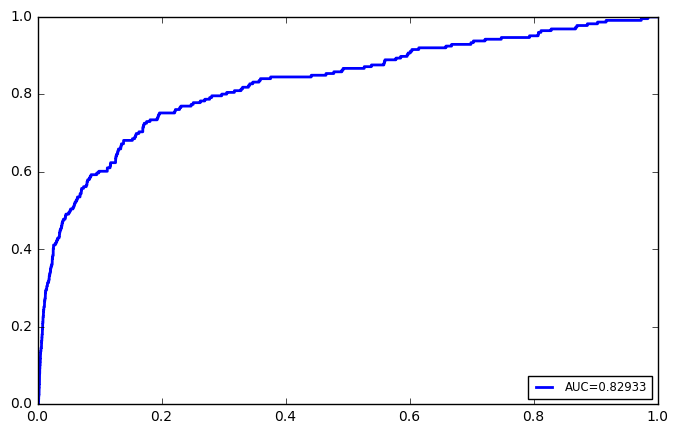

In [36]:
f, axes = plt.subplots(1, figsize=(8, 5))
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
axes.step(fpr, tpr, lw=2,label=lab)
axes.legend(loc='lower right', fontsize='small')
plt.show()

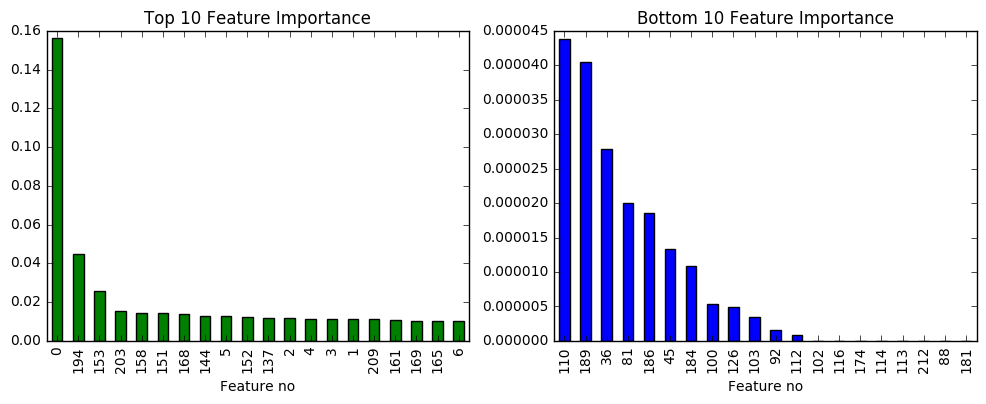

In [40]:
# Feature importances
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
importances = rf.fit(X_train, y_train).feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

important = list()
for f in range(X_train.shape[1]):
        important.append([indices[f],importances[indices[f]]])
        
important_df = pd.DataFrame(important)
important_df.columns = ['Feature no','Importance']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
important_df[:20].plot(kind='bar', x='Feature no', color='g',ax=axes[0], title='Top 10 Feature Importance', legend=False)
important_df[200:].plot(kind='bar', x='Feature no', color='b',ax=axes[1], title='Bottom 10 Feature Importance', legend=False)

In [41]:
# Insignificant features
least_impdf = pd.DataFrame(important_df[214:])
least_impdf['Feature names'] = X_train.columns[[important_df[214:]['Feature no']]]
least_impdf[['Feature names','Importance']]

,Feature names,Importance
214,usertag_10118,0.0
215,slotheight_150,0.0
216,slotheight_125,0.0
217,usertag_15398,0.0
218,slotwidth_125,0.0
219,usertag_10130,0.0


In [42]:
# Fit the classification model on feature subset
X_train_1 = X_train.drop(X_train.columns[[important_df[214:]['Feature no']]], axis=1)
X_val_1 = X_val.drop(X_val.columns[[important_df[214:]['Feature no']]], axis=1)

clf_l2_LR_1 = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred_1 = clf_l2_LR.fit(X_train_1, y_train).predict(X_val_1)
predprobs_1 = clf_l2_LR.predict_proba(X_val_1)
pCTR_1 = pd.DataFrame(predprobs_1)
pred_1 =[]

a = len(train) / 2 * np.bincount(train.click)
w = a[1] / a[0]

for p in pCTR_1[1]:
    pred_1.append( p / (p + ((1-p)/w)))
    
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve([click for click in validation.click], pred_1)
print('AUC accuracy after feature selection:',metrics.auc(fpr_1, tpr_1))

AUC accuracy after feature selection: 0.829324946724


# <span style= "color:maroon"> We used the logistic regression results for the bidding functions as it gave the best accuracy. </span>

# <span style= "color:maroon"> Naive Bayes and MLP as implemented by James are in different files.</span>

# <span style= "color:maroon"> XGBoost implemented by Kamakshi are also in a different file.</span>

# <span style= "color:maroon"> Check the github folder for implementations of the other pCTR estimators.</span>

# 2. Linear Bidding Function --> Said
bid = base_bid * pCTR / avgCTR

In [49]:
# Average CTR
avgCTR = (train.click.sum() / train.logtype.sum())

# Bid generator
def bid_gen(strat_type, lowerbound, upperbound, step):

    bids = []
    base_bids = np.arange(lowerbound,upperbound,step)
    
    for base_bid in base_bids:
        for i in range(0, len(pred)):
            if strat_type == 'linear':
                bid = base_bid * (pred[i] / avgCTR)
                bids.append(bid)         
            elif strat_type == 'nonlinear':
                bid = base_bid * (pred[i] / avgCTR) ** 2
                bids.append(bid)   
            elif strat_type == 'exponential':
                bid = base_bid * np.exp(pred[i] / avgCTR)
                bids.append(bid)   
    bid_chunks = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]
    return bid_chunks, base_bids

# Bidding function
def bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0    
    budget = 6250000    
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

# Apply different bidding strategies
def bid_strategy(strat):
    startbidgentime = time.time()

    print("Starting %s bid generation" % strat)
    bid_chunks, base_bids = bid_gen(strat, 2, 302, 2)
    print(" %s big generation finished in %s minutes" % (strat,round(((time.time() - startbidgentime)/60),2)))

    bid_df = pd.DataFrame()
    bid_df['bid'] = base_bids
    bid_df['bidding_strategy'] = strat

    im = []
    clks = []
    ct = []

    startbidtime = time.time()
    print("Starting %s Bidding" % strat)

    for bids in bid_chunks:
        [imps, clicks, cost] = bidding(bids)
        im.append(imps)
        clks.append(clicks)
        ct.append(cost)

    bid_df['imps_won'] = im
    bid_df.imps_won = bid_df.imps_won.astype(int)
    bid_df['total_spend'] = ct
    bid_df['clicks'] = clks
    bid_df['CTR'] = (bid_df.clicks/bid_df.imps_won * 100).round(4).astype(str)
    bid_df['CPM'] = (bid_df.total_spend/bid_df.imps_won * 1000).round(2).astype(str)
    bid_df['CPC'] = (bid_df.total_spend/bid_df.clicks).round(2).astype(str)
    print(" %s bidding finished in %s minutes" % (strat,round(((time.time() - startbidtime)/60),2)))
    return bid_df

In [45]:
lin = bidding_strategy('linear')

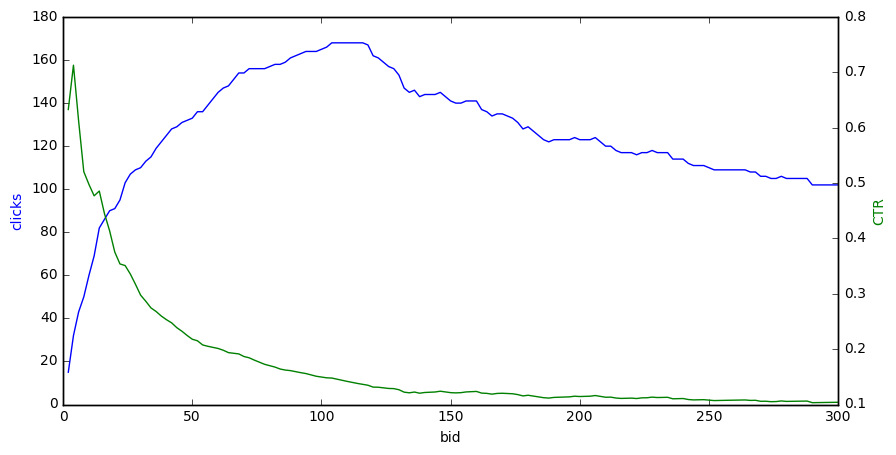

In [46]:
# Linear bidding performance
b = lin[['clicks','bid']].astype(float)
a = lin[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('linear.PNG', dpi=100)
plt.show()

In [47]:
# Best linear bid on click metric
lin.iloc[np.where(lin.clicks == lin.clicks.max())[0]]

,bid,bidding_strategy,imps_won,total_spend,clicks,CTR,CPM,CPC
51,104,linear,113686,5547127.0,168,0.1478,48793.4,33018.61
52,106,linear,115334,5655144.0,168,0.1457,49032.76,33661.57
53,108,linear,116974,5766663.0,168,0.1436,49298.67,34325.38
54,110,linear,118570,5873097.0,168,0.1417,49532.74,34958.91
55,112,linear,120180,5977030.0,168,0.1398,49733.98,35577.56
56,114,linear,121715,6084171.0,168,0.138,49987.03,36215.3
57,116,linear,123172,6183731.0,168,0.1364,50204.03,36807.92


# 3. Squared Bidding Function --> Said
bid = base_bid * (pCTR / avgCTR) ^ 2

In [51]:
nonlin = bid_strategy('nonlinear')

Starting nonlinear bid generation
 nonlinear big generation finished in 1.52 minutes
Starting nonlinear Bidding
 nonlinear bidding finished in 18.19 minutes


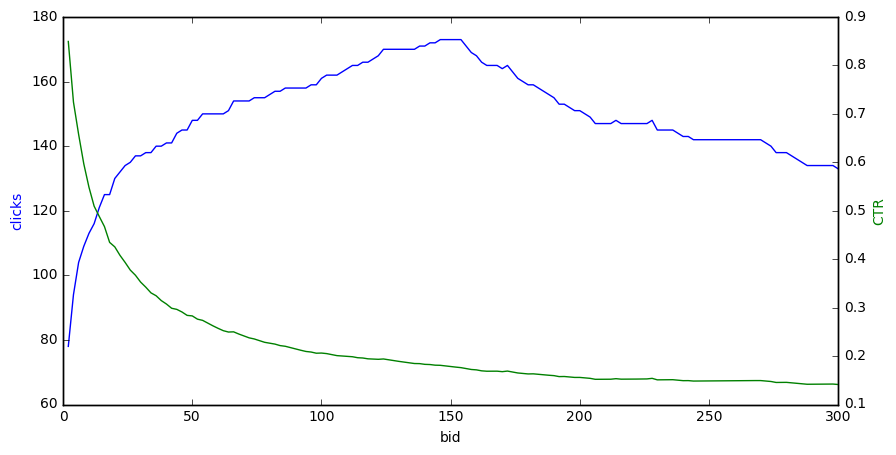

In [52]:
# Non Linear bidding performance
b = nonlin[['clicks','bid']].astype(float)
a = nonlin[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('nonlinear.PNG', dpi=100)
plt.show()

In [53]:
# Best nonlinear bid on click metric
nonlin.iloc[np.where(nonlin.clicks == nonlin.clicks.max())[0]]

,bid,bidding_strategy,imps_won,total_spend,clicks,CTR,CPM,CPC
72,146,nonlinear,95651,6063093.0,173,0.1809,63387.66,35046.78
73,148,nonlinear,96347,6111590.0,173,0.1796,63433.11,35327.11
74,150,nonlinear,96977,6155535.0,173,0.1784,63474.17,35581.13
75,152,nonlinear,97654,6205638.0,173,0.1772,63547.2,35870.74
76,154,nonlinear,98261,6250035.0,173,0.1761,63606.47,36127.37


# 4. Exponential Bidding Function --> Kamakshi
bid = base_bid * e^(pCTR / avgCTR)

In [54]:
exp = bid_strategy('exponential')

Starting exponential bid generation


C:\Users\SAID_ABDULLAHI\Anaconda2\envs\python35\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: overflow encountered in exp
C:\Users\SAID_ABDULLAHI\Anaconda2\envs\python35\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: overflow encountered in multiply


 exponential big generation finished in 2.05 minutes
Starting exponential Bidding
 exponential bidding finished in 15.07 minutes


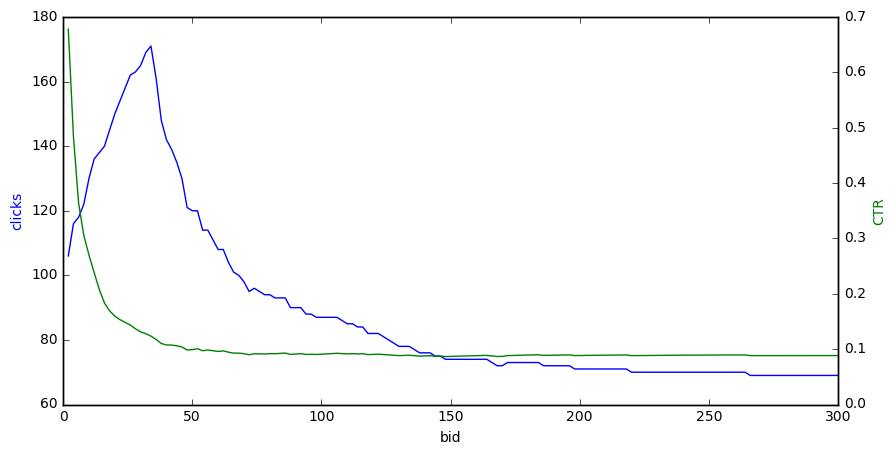

In [55]:
# Exponential bidding performance
b = exp[['clicks','bid']].astype(float)
a = exp[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('exp.PNG', dpi=100)
plt.show()

In [56]:
# Best exponential bid on click metric
exp.iloc[np.where(exp.clicks == exp.clicks.max())[0]]

,bid,bidding_strategy,imps_won,total_spend,clicks,CTR,CPM,CPC
16,34,exponential,138421,6199575.0,171,0.1235,44787.82,36254.82


# 5. ORTB Bidding Strategy --> Said


ORTB = *√ c / λ  x  θ + c^2 − c

In [57]:
lambda_range = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
c_range = np.arange(1,21,1)

ortbbids = []
clambda = []

for c in c_range:
    for lambdas in lambda_range:
        clambda.append((c,lambdas))
        ortbbid = np.sqrt((c / lambdas * np.asarray(pred)) + c**2 - c)
        ortbbids.append(ortbbid.tolist())

In [58]:
def ORTB_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

ortb = pd.DataFrame()
ortb['C,Lambda'] = clambda

im = []
clks = []
ct = []

starttime = time.time()
print("Starting ORTB Bidding")

for bid in ortbbids:
    [imps, clicks, cost] = ORTB_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
ortb['imps_won'] = im
ortb.imps_won = ortb.imps_won.astype(int)
ortb['total_spend'] = ct
ortb['clicks'] = clks
ortb['CTR'] = (ortb.clicks/ortb.imps_won * 100).round(4).astype(str)
ortb['CPM'] = (ortb.total_spend/ortb.imps_won * 1000).round(2).astype(str)
ortb['CPC'] = (ortb.total_spend/ortb.clicks).round(2).astype(str)

print("ORTB Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Starting ORTB Bidding
ORTB Bidding Finished in 35.9 minutes


In [59]:
# Best ortb bid on click metric
ortb.iloc[np.where(ortb.clicks == ortb.clicks.max())[0]]

,"C,Lambda",imps_won,total_spend,clicks,CTR,CPM,CPC
107,"(6, 5e-07)",144370,6133571.0,168,0.1164,42485.08,36509.35
228,"(12, 1e-06)",146697,6250021.0,168,0.1145,42604.97,37202.51


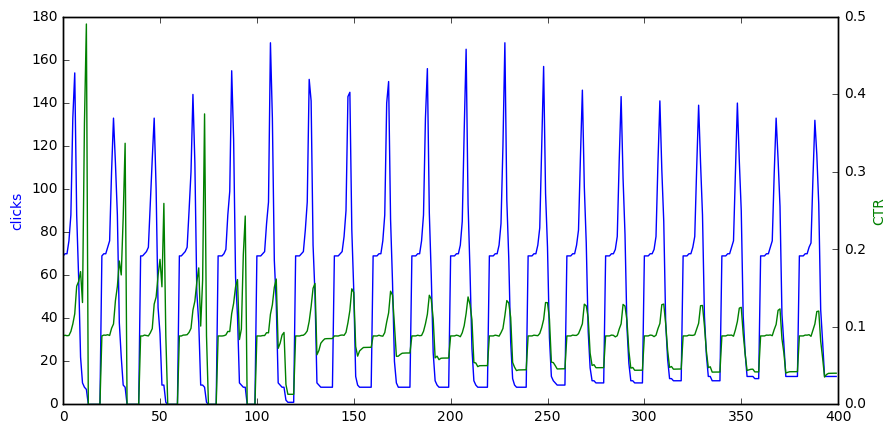

In [60]:
# ORTB bidding performance
b = ortb[['clicks','C,Lambda']]
a = ortb[['C,Lambda','CTR']]

fig, ax1 = plt.subplots()
ax1.plot(b.clicks)
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
# fig.savefig('nonlinear.PNG', dpi=100)
plt.show()

# 6. Gate bidding strategy --> James
if pCTR_norm > optimal_norm: bid = 300 ; else bid = 0

In [61]:
# Gate bid generator
def gate_bid_gen():
    bids = []
    norms = np.linspace(0.8,0.9,21)
    
    for norm in norms:
        for i in range(0, len(pred)):
            if (pred[i] / avgCTR) >= norm:
                bid = 300
                bids.append(bid)         
            else:
                bid = 0
                bids.append(bid)      
    bid_chunks = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]
    return bid_chunks, norms

bid_chunks,norms = gate_bid_gen()

gate_df = pd.DataFrame()

im = []
clks = []
ct = []

starttime = time.time()
print("Starting gate bidding")

for bids in bid_chunks:
    [imps, clicks, cost] = bidding(bids)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
gate_df['pCTR/avgCTR'] = norms
gate_df['imps_won'] = im
gate_df.imps_won = gate_df.imps_won.astype(int)
gate_df['total_spend'] = ct
gate_df['clicks'] = clks
gate_df['CTR'] = (gate_df.clicks/gate_df.imps_won * 100).round(4).astype(str)
gate_df['CPM'] = (gate_df.total_spend/gate_df.imps_won * 1000).round(2).astype(str)
gate_df['CPC'] = (gate_df.total_spend/gate_df.clicks).round(2).astype(str)
print("gate bidding finished in %s minutes"% round(((time.time() - starttime)/60),2))

# Best gate bid with highest clicks
gate_df.iloc[np.where(gate_df.clicks == gate_df.clicks.max())[0]]

Starting gate bidding
gate bidding finished in 2.35 minutes


,bidding_strategy,pCTR/avgCTR,imps_won,total_spend,clicks,CTR,CPM,CPC
4,NaN,0.82,68788,6234152.0,173,0.2515,90628.48,36035.56


# 6. Analysis of bidding strategies --> James


In [152]:
# Best strategy
nonlinbest=pd.DataFrame(nonlin.iloc[72]).drop(['bid','bidding_strategy'])
expbest=pd.DataFrame(exp.iloc[16]).drop(['bid','bidding_strategy'])
gatebest=pd.DataFrame(gate_df.iloc[4]).drop(['pCTR/avgCTR','bidding_strategy'])

best_strat_df =  pd.concat([expbest,nonlinbest,gatebest],1)
best_strat_df.columns  = ['exponential','squared','gate']
best_strat_df = best_strat_df.T
best_strat_df.total_spend = best_strat_df.total_spend.astype(str)
best_strat_df

,imps_won,total_spend,clicks,CTR,CPM,CPC
exponential,138421,6199575.0,171,0.1235,44787.82,36254.82
squared,95651,6063093.0,173,0.1809,63387.66,35046.78
gate,68788,6234152.0,173,0.2515,90628.48,36035.56


In [153]:
# Comparison of the all bidding strategies
constbest=pd.DataFrame(const.iloc[79]).drop('constants')
randbest=pd.DataFrame(randm.iloc[97]).drop('upper_bound')
linbest=pd.DataFrame(lin.iloc[51]).drop(['bid','bidding_strategy'])
nonlinbest=pd.DataFrame(nonlin.iloc[72]).drop(['bid','bidding_strategy'])
expbest=pd.DataFrame(exp.iloc[16]).drop(['bid','bidding_strategy'])
ortbbest=pd.DataFrame(ortb.iloc[107]).drop('C,Lambda')
gatebest=pd.DataFrame(gate_df.iloc[4]).drop(['pCTR/avgCTR','bidding_strategy'])

comp_df = pd.concat([constbest,randbest,linbest,ortbbest,expbest,nonlinbest,gatebest],1)
comp_df.columns = ['constant','random','linear','ortb','exponential','squared','gate']
comp_df = comp_df.T
comp_df.total_spend = comp_df.total_spend.astype(str)
comp_df

,imps_won,total_spend,clicks,CTR,CPM,CPC
constant,103404,6250004.0,85,0.0822,60442.57,73529.46
random,121232,6250056.0,85,0.0701,51554.51,73530.07
linear,113686,5547127.0,168,0.1478,48793.4,33018.61
ortb,144370,6133571.0,168,0.1164,42485.08,36509.35
exponential,138421,6199575.0,171,0.1235,44787.82,36254.82
squared,95651,6063093.0,173,0.1809,63387.66,35046.78
gate,68788,6234152.0,173,0.2515,90628.48,36035.56


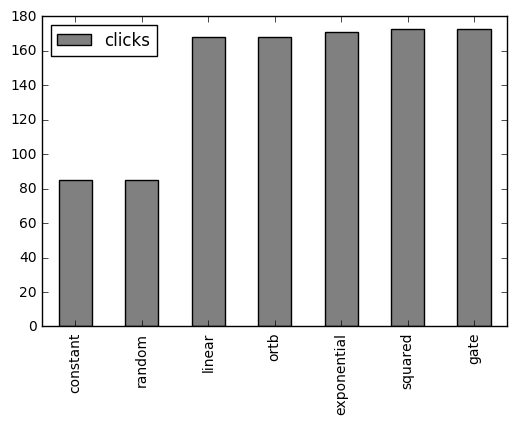

In [155]:
comp_df.plot(kind='bar',y='clicks',color='grey')

In [159]:
# Test bids ~~ best strategy is the gate function
for i in range(0,len(pred_test)):
    if (pred_test[i] / avgCTR) >= 0.82:
        bid = 300
        bids.append(bid)         
    else:
        bid = 0
        bids.append(bid)
testbids = pd.DataFrame(bids)
testbids.columns = ['bids']
testbids.to_csv('test_bids.csv')
testbids.head()

,bids
0,0
1,300
2,300
3,300
4,0
